In [1]:
# Gates code for FP 

## Textmining Naive Bayes Example
import nltk
import pandas as pd
import sklearn
import re  
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")


import codecs
from sklearn import feature_extraction

#Convert a collection of raw documents to a matrix of TF-IDF features.
#Equivalent to CountVectorizer but with tf-idf norm
from sklearn.feature_extraction.text import TfidfVectorizer


from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
## For Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import os
import os.path

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import string
import numpy as np
import scikitplot as skplt
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set(style="darkgrid")
sns.set(font_scale=1.3)

In [2]:
df =  pd.read_csv("C:/Users/aivii/programsmm/FP736/corpus/combined_csv1.csv")
print(df.head)
df = df.drop(df.columns[[0]], axis=1) # remove the first column 
print(df.head)

<bound method NDFrame.head of        Unnamed: 0  label                                            reviews
0               0      1  I went and saw this movie last night after bei...
1               1      1  Actor turned director Bill Paxton follows up h...
2               2      1  As a recreational golfer with some knowledge o...
3               3      1  I saw this film in a sneak preview, and it is ...
4               4      1  Bill Paxton has taken the true story of the 19...
...           ...    ...                                                ...
49995       24995      0  Towards the end of the movie, I felt it was to...
49996       24996      0  This is the kind of movie that my enemies cont...
49997       24997      0  I saw 'Descent' last night at the Stockholm Fi...
49998       24998      0  Some films that you pick up for a pound turn o...
49999       24999      0  This is one of the dumbest films, I've ever se...

[50000 rows x 3 columns]>
<bound method NDFrame.head of  

C:\Users\aivii\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\aivii\Anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


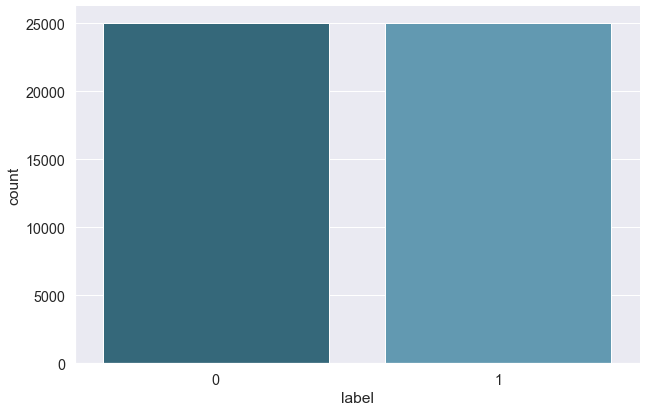

In [3]:
sns.factorplot(x="label", data=df, kind="count", size=6, aspect=1.5, palette="PuBuGn_d")
plt.style.use(u'seaborn-white')
plt.show();

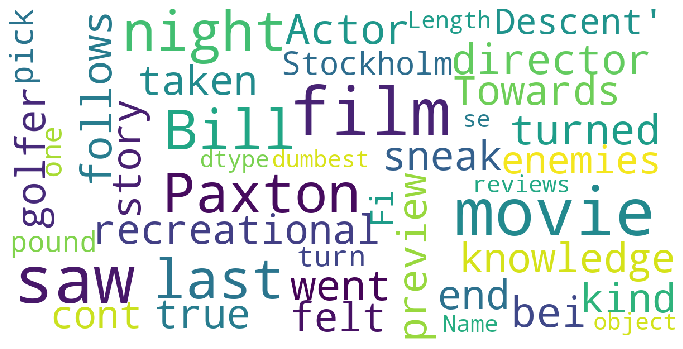

In [4]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df['reviews'])


In [5]:
## Generating one row  
rows = df.sample(frac =.75) 
  
## Checking if sample is 0.75 times data or not 
  
if (0.75*(len(df))== len(rows)): 
    print( "Cool") 
    print(len(df), len(rows)) 
  
## Display 
print(rows)

Cool
50000 37500
       label                                            reviews
32267      1  It has only been a week since I saw my first J...
30521      1  I remember when this film was up for the Acade...
25601      1  I thought this was an awesome movie. The theme...
39370      0  This movie makes no sense at all, there are pl...
45834      0  I was able to hang in for only the first twent...
...      ...                                                ...
34441      1  When I saw the Exterminators of year 3000 at f...
25620      1  I haven't written a review on IMDb for the lon...
30292      1  Actor Herman José plays the role of a football...
34622      1  I happened on "Shower" in the foreign film sec...
1432       1  When I sat down to watch Greek for the first t...

[37500 rows x 2 columns]


In [6]:
rows.shape

(37500, 2)

In [7]:
#rows.to_csv(r'C:\Users/aivii\programsmm\FP736\COMBINED_TEST_TR.csv', index = False)

In [8]:
RawfileName0="C:/Users/aivii/programsmm/FP736/COMBINED_TEST_TR.csv"

In [9]:
## This file has a header. 
## It has "setinment" and "review" on the first row.

## We will create a list of labels and a list of reviews
AllReviewsList=[]
AllLabelsList=[]

with open(RawfileName0,'r', encoding="utf8") as FILE:
    FILE.readline() # skip header line - skip row 1
    ## This reads the line and so does nothing with it
    for row in FILE:
        NextLabel,NextReview=row.split(",", 1)
        #print(Label)
        #print(Review)
        AllReviewsList.append(NextReview)
        AllLabelsList.append(NextLabel)

#print(AllReviewsList)
#print(AllLabelsList) # all the labels 

In [10]:
REPLACE_NO_SPACE = re.compile("()|(%)|(\.)|(\;)|(\:)|(\!)|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)|(\*+)")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
NO_SPACE = ""
SPACE = " "

def preprocess_reviews(reviews):
    
    reviews = [REPLACE_NO_SPACE.sub(NO_SPACE, line.lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(SPACE, line) for line in reviews]
    
    return reviews

In [11]:
AllReviewList_clean = preprocess_reviews(AllReviewsList)
print(AllReviewList_clean[5])

the movie is not that bad ringo lam sucks i hate when van damme has love in his movies van damme is good only when he doesn't have love in his movies



In [12]:
"""from nltk.corpus import stopwords
print(stopwords.words('english'))"""

"from nltk.corpus import stopwords\nprint(stopwords.words('english'))"

In [13]:
# no point removing them now
from nltk.corpus import stopwords

english_stop_words = stopwords.words('english')
mine_stop_words = ['in', 'of', 'at', 'a', 'the','movie','film','actor', 'actors']
extend_stop_words = english_stop_words+mine_stop_words 

"""def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        removed_stop_words.append(
            ' '.join([word for word in review.split() 
                      if word not in extend_stop_words])
        )
    return removed_stop_words

AllReviewList_cl_nstop = remove_stop_words(AllReviewList_clean)"""

"def remove_stop_words(corpus):\n    removed_stop_words = []\n    for review in corpus:\n        removed_stop_words.append(\n            ' '.join([word for word in review.split() \n                      if word not in extend_stop_words])\n        )\n    return removed_stop_words\n\nAllReviewList_cl_nstop = remove_stop_words(AllReviewList_clean)"

In [14]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [15]:
## CountVectorizer
My_CV1=CountVectorizer(input='content',
                        stop_words= extend_stop_words,
                        max_features=100,
                        ngram_range=(1, 4), 
                        analyzer='word', 
                        max_df=1.0, # ignore terms w document freq strictly > threshold 
                        min_df=1, 
                        binary=False,
                        token_pattern=r'\b[^\d\W]+\b'
                        )


## CountVectorizer - Bernouli
My_CV1B=CountVectorizer(input='content',
                        stop_words= extend_stop_words,
                        max_features=100,
                        ngram_range=(1, 4), 
                        analyzer='word', 
                        max_df=1.0, # ignore terms w document freq strictly > threshold 
                        min_df=1, 
                        binary=True,
                        token_pattern=r'\b[^\d\W]+\b'
                        )



## Tfidf Vectorizer - normalized
My_TF1=TfidfVectorizer(input='content',
                        stop_words=extend_stop_words,
                        max_features=100,
                        #max_features=2000,
                        #min_df=0.2, 
                        
                        #use_idf=True, 
                        #tokenizer=tokenize_and_stem,
                        ngram_range=(1,3)
                        
                        )


## NOw I can vectorize using my list of complete paths to my files
X_CV1=My_CV1.fit_transform(AllReviewList_clean)
X_CV1B=My_CV1B.fit_transform(AllReviewList_clean)
X_TF1=My_TF1.fit_transform(AllReviewList_clean)

print(My_CV1.vocabulary_)
print(My_CV1B.vocabulary_)
print(My_TF1.vocabulary_)


{'thought': 85, 'make': 46, 'funny': 26, 'also': 3, 'old': 57, 'enough': 18, 'movies': 51, 'made': 45, 'world': 96, 'young': 99, 'another': 4, 'life': 38, 'man': 48, 'like': 39, 'films': 23, 'know': 37, 'well': 93, 'best': 8, 'say': 69, 'plot': 62, 'long': 41, 'seems': 73, 'way': 92, 'though': 84, 'end': 17, 'better': 9, 'going': 30, 'would': 97, 'ever': 20, 'comedy': 14, 'see': 72, 'show': 76, 'still': 78, 'great': 33, 'even': 19, 'really': 66, 'story': 79, 'good': 31, 'love': 44, 'look': 42, 'cast': 11, 'think': 83, 'director': 16, 'much': 52, 'acting': 0, 'little': 40, 'one': 58, 'work': 95, 'could': 15, 'years': 98, 'find': 24, 'watch': 90, 'makes': 47, 'without': 94, 'bad': 7, 'things': 82, 'may': 50, 'series': 75, 'get': 27, 'time': 86, 'character': 12, 'role': 68, 'back': 6, 'right': 67, 'action': 1, 'must': 53, 'nothing': 56, 'new': 55, 'characters': 13, 'two': 87, 'scenes': 71, 'actually': 2, 'part': 60, 'us': 88, 'first': 25, 'something': 77, 'want': 89, 'people': 61, 'quite'

In [16]:
ColNames=My_CV1.get_feature_names()


## OK good - but we want a document topic model A DTM (matrix of counts)
DataFrame_CV=pd.DataFrame(X_CV1.toarray(), columns=ColNames)
DataFrame_CVB=pd.DataFrame(X_CV1B.toarray(), columns=ColNames)
DataFrame_TF=pd.DataFrame(X_TF1.toarray(), columns=ColNames)

# Update row names with file names
MyDict = {}
for i in range(0, len(AllLabelsList)):
    MyDict[i] = AllLabelsList[i]

#print("MY DICT", MyDict)

In [17]:
DataFrame_CV = DataFrame_CV.rename(MyDict, axis = "index")
DataFrame_CVB = DataFrame_CVB.rename(MyDict, axis = "index")
DataFrame_TF = DataFrame_TF.rename(MyDict, axis = "index")

DataFrame_CV.index.name = 'LABEL'
DataFrame_CVB.index.name = 'LABEL'
DataFrame_TF.index.name = 'LABEL'

## Drop/remove columns not wanted
print(DataFrame_CV.columns)

Index(['acting', 'action', 'actually', 'also', 'another', 'around', 'back',
       'bad', 'best', 'better', 'big', 'cast', 'character', 'characters',
       'comedy', 'could', 'director', 'end', 'enough', 'even', 'ever', 'every',
       'fact', 'films', 'find', 'first', 'funny', 'get', 'give', 'go', 'going',
       'good', 'got', 'great', 'guy', 'horror', 'however', 'know', 'life',
       'like', 'little', 'long', 'look', 'lot', 'love', 'made', 'make',
       'makes', 'man', 'many', 'may', 'movies', 'much', 'must', 'never', 'new',
       'nothing', 'old', 'one', 'original', 'part', 'people', 'plot', 'pretty',
       'quite', 'real', 'really', 'right', 'role', 'say', 'scene', 'scenes',
       'see', 'seems', 'seen', 'series', 'show', 'something', 'still', 'story',
       'take', 'thing', 'things', 'think', 'though', 'thought', 'time', 'two',
       'us', 'want', 'watch', 'watching', 'way', 'well', 'without', 'work',
       'world', 'would', 'years', 'young'],
      dtype='object')


In [18]:
print("\nNumber of columns:")
print(len(DataFrame_CV.columns))


Number of columns:
100


In [19]:
DataFrame_CV.head(5)

,acting,action,actually,also,another,around,back,bad,best,better,...,watch,watching,way,well,without,work,world,would,years,young
LABEL,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
0,0,0,0,0,0,0,0,0,1,1,...,0,0,1,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
0,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,1,0


In [20]:
DataFrame_CVB.head(5)

,acting,action,actually,also,another,around,back,bad,best,better,...,watch,watching,way,well,without,work,world,would,years,young
LABEL,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
0,0,0,0,0,0,0,0,0,1,1,...,0,1,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0


In [21]:
DataFrame_TF.head(5)

,acting,action,actually,also,another,around,back,bad,best,better,...,watch,watching,way,well,without,work,world,would,years,young
LABEL,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.0,0.0,0.525011,0.217323,0.0,0.0,0.0,0.000000,0.000000,...,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.236424,0.000000,0.000000,0.479335
0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.163816,0.166574,...,0.0000,0.0,0.151882,0.137576,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.444917,0.000000,0.000000
0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.462934,...,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.183296,0.000000,0.000000
1,0.207795,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.2063,0.0,0.000000,0.000000,0.262097,0.244025,0.000000,0.000000,0.241631,0.000000


In [22]:
def Logical_Numbers_Present(anyString):
    return any(char.isdigit() for char in anyString)

In [23]:
MyStops=["also", "and", "are", "you", "of", "let", "not", "the", "for", "why", "there", "one", "which"]
for nextcol in DataFrame_CV.columns:
    
    Result=str.isdigit(nextcol) ## Fast way to check numbers
    
    LogResult=Logical_Numbers_Present(nextcol)
    ## The above returns a logical of True or False
    
    ## The following will remove all columns that contains numbers
    if(LogResult==True):
        #print(LogResult)
        #print(nextcol)
        DataFrame_CV=DataFrame_CVB.drop([nextcol], axis=1)
        DataFrame_TF=DataFrame_TF.drop([nextcol], axis=1)

   
    elif(len(str(nextcol))<=3 or (nextcol in MyStops)):
        #print(nextcol)
        DataFrame_CVB=DataFrame_CV.drop([nextcol], axis=1)
        #DataFrame_TF=DataFrame_TF.drop([nextcol], axis=1)

In [24]:
MyStops=["also", "and", "are", "you", "of", "let", "not", "the", "for", "why", "there", "one", "which"]
for nextcol in DataFrame_CVB.columns:
    
    Result=str.isdigit(nextcol) ## Fast way to check numbers
    
    LogResult=Logical_Numbers_Present(nextcol)
    ## The above returns a logical of True or False
    
    ## The following will remove all columns that contains numbers
    if(LogResult==True):
        #print(LogResult)
        #print(nextcol)
        DataFrame_CV=DataFrame_CVB.drop([nextcol], axis=1)
        DataFrame_TF=DataFrame_TF.drop([nextcol], axis=1)

   
    elif(len(str(nextcol))<=3 or (nextcol in MyStops)):
        #print(nextcol)
        DataFrame_CVB=DataFrame_CVB.drop([nextcol], axis=1)
        DataFrame_TF=DataFrame_TF.drop([nextcol], axis=1)

In [25]:
print(DataFrame_CV.columns)

Index(['acting', 'action', 'actually', 'also', 'another', 'around', 'back',
       'bad', 'best', 'better', 'big', 'cast', 'character', 'characters',
       'comedy', 'could', 'director', 'end', 'enough', 'even', 'ever', 'every',
       'fact', 'films', 'find', 'first', 'funny', 'get', 'give', 'go', 'going',
       'good', 'got', 'great', 'guy', 'horror', 'however', 'know', 'life',
       'like', 'little', 'long', 'look', 'lot', 'love', 'made', 'make',
       'makes', 'man', 'many', 'may', 'movies', 'much', 'must', 'never', 'new',
       'nothing', 'old', 'one', 'original', 'part', 'people', 'plot', 'pretty',
       'quite', 'real', 'really', 'right', 'role', 'say', 'scene', 'scenes',
       'see', 'seems', 'seen', 'series', 'show', 'something', 'still', 'story',
       'take', 'thing', 'things', 'think', 'though', 'thought', 'time', 'two',
       'us', 'want', 'watch', 'watching', 'way', 'well', 'without', 'work',
       'world', 'would', 'years', 'young'],
      dtype='object')


In [26]:
DataFrame_CV.head(5)

,acting,action,actually,also,another,around,back,bad,best,better,...,watch,watching,way,well,without,work,world,would,years,young
LABEL,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
0,0,0,0,0,0,0,0,0,1,1,...,0,0,1,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
0,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,1,0


In [27]:
print("\nNumber of columns:")
print(len(DataFrame_CV.columns))


Number of columns:
100


In [28]:
print("\nNumber of columns:")
print(len(DataFrame_CVB.columns))


Number of columns:
81


In [29]:
print("\nNumber of columns:")
print(len(DataFrame_TF.columns))


Number of columns:
82


In [30]:
DataFrame_CV1 = DataFrame_CV.reset_index()
#DataFrame_CV1B = DataFrame_CVB.reset_index()
#DataFrame_TF1 = DataFrame_TF.reset_index()

In [31]:
DataFrame_CV1.head()
#DataFrame_CV1B
#DataFrame_TF1

,LABEL,acting,action,actually,also,another,around,back,bad,best,...,watch,watching,way,well,without,work,world,would,years,young
0,1,0,0,0,3,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,1,0


In [32]:
DataFrame_CV1B = DataFrame_CVB.reset_index()
DataFrame_TF1 = DataFrame_TF.reset_index()

In [33]:
print("\nNumber of columns:")
print(len(DataFrame_CV1.columns))


Number of columns:
101


In [34]:
print("\nNumber of columns:")
print(len(DataFrame_CV1B.columns))


Number of columns:
82


In [35]:
print("\nNumber of columns:")
print(len(DataFrame_TF1.columns))


Number of columns:
83


### __k-means__

In [36]:
# Convert DataFrame to matrix
MyMatrixClean = DataFrame_TF1.values
## Check it
print(type(MyMatrixClean))
print(MyMatrixClean)

# Using sklearn
## you will need
from sklearn.cluster import KMeans
import numpy as np
kmeans_object2 = sklearn.cluster.KMeans(n_clusters=3)
#print(kmeans_object)


<class 'numpy.ndarray'>
[['1' 0.0 0.0 ... 0.0 0.0 0.47933480053263355]
 ['0' 0.0 0.0 ... 0.0 0.0 0.0]
 ['1' 0.0 0.0 ... 0.44491727912464774 0.0 0.0]
 ...
 ['1' 0.0 0.298267974408134 ... 0.0 0.0 0.0]
 ['1' 0.0 0.18370119033410146 ... 0.0 0.0 0.0]
 ['0' 0.1772879609654968 0.0 ... 0.14856469304991643 0.0 0.0]]


In [37]:
kmeans_object2.fit(MyMatrixClean)
# Get cluster assignment labels
labels2 = kmeans_object2.labels_
print("k-means with k = 3\n", labels2)
# Format results as a DataFrame
Myresults2 = pd.DataFrame([DataFrame_TF1.index,labels2]).T
print("k means RESULTS\n", Myresults2)

k-means with k = 3
 [1 0 2 ... 1 2 0]
k means RESULTS
            0  1
0          0  1
1          1  0
2          2  2
3          3  0
4          4  1
...      ... ..
37495  37495  1
37496  37496  0
37497  37497  1
37498  37498  2
37499  37499  0

[37500 rows x 2 columns]


##### Test Train split

In [38]:
## Train, Test split - Count Vectorizer 
from sklearn.model_selection import train_test_split
import random 
random.seed (1234)
TrainDF, TestDF = train_test_split(DataFrame_CV1, test_size=0.3)

## Now we have a training set and a testing set. 
print("\nThe training set is:")
print(TrainDF)
print("\nThe testing set is:")
print(TestDF)


The training set is:
      LABEL  acting  action  actually  also  another  around  back  bad  best  \
9216      0       0       0         2     0        1       0     0    0     0   
26840     0       1       0         0     0        0       0     0    3     0   
30638     1       0       0         0     0        0       0     0    0     0   
12023     0       0       0         1     0        0       0     1    0     0   
32251     1       0       3         0     3        0       3     0    0     0   
...     ...     ...     ...       ...   ...      ...     ...   ...  ...   ...   
32245     1       0       0         0     0        0       0     0    0     0   
31416     1       0       0         1     0        0       0     0    0     0   
28566     0       1       0         0     0        0       0     0    0     0   
32971     1       0       0         0     0        0       0     0    0     0   
29466     1       1       0         0     1        0       0     0    0     0   

     

In [39]:
## Train, Test split - Count Vectorizer - Bernoulli
from sklearn.model_selection import train_test_split
import random 
random.seed (1234)
TrainDFB, TestDFB = train_test_split(DataFrame_CV1B, test_size=0.3)

## Now we have a training set and a testing set. 
#print("\nThe training set is:")
#print(TrainDFB)
#print("\nThe testing set is:")
#print(TestDFB)

In [40]:
## Train, Test split -TF
from sklearn.model_selection import train_test_split
import random 
random.seed (1234)
TrainDF_tf, TestDF_tf = train_test_split(DataFrame_TF1, test_size=0.3)

## Now we have a training set and a testing set. 
#print("\nThe training set is:")
#print(TrainDF_tf)
#print("\nThe testing set is:")
#print(TestDF_tf)

In [41]:
## Save labels
TestLabels=TestDF["LABEL"]
#print(TestLabels)

## remove labels
## Make a copy of TestDF
CopyTestDF=TestDF.copy()
TestDF = TestDF.drop(["LABEL"], axis=1)
print(TestDF)

## DF seperate TRAIN SET from the labels
TrainDF_nolabels=TrainDF.drop(["LABEL"], axis=1)
#print(TrainDF_nolabels)
TrainLabels=TrainDF["LABEL"]
#print(TrainLabels)

       acting  action  actually  also  another  around  back  bad  best  \
12362       0       0         0     0        0       0     0    0     0   
22610       0       0         0     0        0       0     0    1     1   
8629        0       0         0     0        0       0     0    0     2   
5606        1       0         1     0        0       0     0    1     1   
30204       0       0         0     0        0       0     0    0     1   
...       ...     ...       ...   ...      ...     ...   ...  ...   ...   
32666       1       0         0     0        0       0     0    0     1   
17447       0       0         0     1        1       0     0    0     1   
14578       0       1         0     1        0       0     0    1     0   
6748        0       0         0     0        0       0     0    0     1   
31134       0       0         0     0        0       0     0    1     0   

       better  ...  watch  watching  way  well  without  work  world  would  \
12362       1  ...  

In [42]:
## Save labels -  Bernoulli
TestLabelsB=TestDFB["LABEL"]
#print(TestLabels)

## remove labels
## Make a copy of TestDF
CopyTestDFB=TestDFB.copy()
TestDFB = TestDFB.drop(["LABEL"], axis=1)
print(TestDFB)

## DF seperate TRAIN SET from the labels
TrainDFB_nolabels=TrainDFB.drop(["LABEL"], axis=1)
#print(TrainDF_nolabels)
TrainLabelsB=TrainDFB["LABEL"]
#print(TrainLabels)

       acting  action  actually  another  around  back  best  better  cast  \
19753       0       0         0        0       1     0     0       0     0   
4064        0       0         0        0       0     0     0       1     1   
13651       0       0         1        0       0     0     0       0     1   
37020       1       0         1        0       0     0     0       1     0   
3838        0       0         0        0       0     0     0       0     0   
...       ...     ...       ...      ...     ...   ...   ...     ...   ...   
23455       0       0         0        0       0     0     0       0     0   
17555       0       0         0        0       0     0     0       0     0   
2313        0       0         0        0       0     0     0       1     1   
8732        0       0         0        0       0     0     0       0     0   
1883        1       0         0        0       0     0     0       0     0   

       character  ...  want  watch  watching  well  without  wo

In [43]:
## Save labels - TF
TestLabels_tf=TestDF_tf["LABEL"]
print(TestLabels)

## remove labels
## Make a copy of TestDF
CopyTestDF_tf=TestDF_tf.copy()
TestDF_tf = TestDF_tf.drop(["LABEL"], axis=1)
print(TestDF_tf)

## DF seperate TRAIN SET from the labels
TrainDF_nolabels_tf=TrainDF_tf.drop(["LABEL"], axis=1)
#print(TrainDF_nolabels)
TrainLabels_tf=TrainDF_tf["LABEL"]
#print(TrainLabels)

12362    0
22610    0
8629     1
5606     1
30204    1
        ..
32666    1
17447    1
14578    0
6748     1
31134    1
Name: LABEL, Length: 11250, dtype: object
         acting  action  actually   another    around      back      best  \
26153  0.000000     0.0  0.280918  0.276383  0.000000  0.000000  0.000000   
28238  0.000000     0.0  0.000000  0.000000  0.000000  0.000000  0.150653   
14764  0.000000     0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
18139  0.000000     0.0  0.000000  0.000000  0.000000  0.000000  0.241552   
3897   0.000000     0.0  0.000000  0.000000  0.000000  0.000000  0.249029   
...         ...     ...       ...       ...       ...       ...       ...   
36314  0.000000     0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
31013  0.000000     0.0  0.000000  0.000000  0.226516  0.000000  0.000000   
29504  0.000000     0.0  0.229246  0.000000  0.000000  0.221552  0.000000   
34102  0.250519     0.0  0.000000  0.000000  0.000000  0.000000  0.

## __MNB__

#### __- CountVect__

In [44]:
from sklearn.naive_bayes import MultinomialNB

MyModelNB= MultinomialNB()

MyModelNB.fit(TrainDF_nolabels, TrainLabels)
Prediction = MyModelNB.predict(TestDF)
print("\nThe prediction from NB is:")
print(Prediction)
print("\nThe actual labels are:")
print(TestLabels)


The prediction from NB is:
['0' '0' '1' ... '1' '1' '0']

The actual labels are:
12362    0
22610    0
8629     1
5606     1
30204    1
        ..
32666    1
17447    1
14578    0
6748     1
31134    1
Name: LABEL, Length: 11250, dtype: object


In [45]:
## confusion matrix
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(TestLabels, Prediction)
print("\nThe confusion matrix is:")
print(cnf_matrix)


The confusion matrix is:
[[4099 1584]
 [1449 4118]]


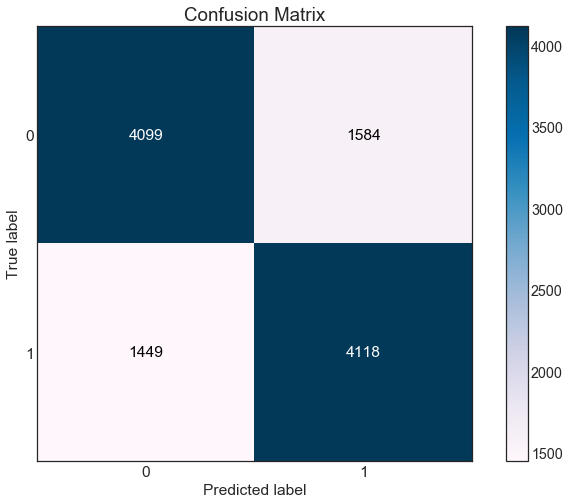

In [46]:
skplt.metrics.plot_confusion_matrix(TestLabels, Prediction ,normalize=False,figsize=(12,8), cmap=plt.cm.PuBu)
plt.show()

In [47]:
print(np.round(MyModelNB.predict_proba(TestDF),2))

[[0.83 0.17]
 [0.98 0.02]
 [0.35 0.65]
 ...
 [0.44 0.56]
 [0.23 0.77]
 [0.85 0.15]]


In [48]:
from sklearn import metrics

print(metrics.classification_report(TestLabels, Prediction))
print(metrics.confusion_matrix(TestLabels, Prediction))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      5683
           1       0.72      0.74      0.73      5567

    accuracy                           0.73     11250
   macro avg       0.73      0.73      0.73     11250
weighted avg       0.73      0.73      0.73     11250

[[4099 1584]
 [1449 4118]]


In [49]:
import pickle
# save the model to disk
filename = 'MNB_model.sav'
pickle.dump(MyModelNB, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(TestLabels, TestDF)
#print(result)

In [50]:
#word_freq = dict(zip(My_CV1.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
#word_counter = collections.Counter(word_freq)
#word_counter_df = pd.DataFrame(word_counter.most_common(20), columns = ['word', 'freq'])
#fig, ax = plt.subplots(figsize=(12, 10))
#sns.barplot(x="word", y="freq", data=word_counter_df, palette="PuBuGn_d", ax=ax)
#plt.show();

In [51]:
def rev_important_features(vectorizer,classifier, n):
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.feature_count_[0], feature_names), reverse = True)[:n]
    topn_class2 = sorted(zip(classifier.feature_count_[1], feature_names), reverse = True)[:n]
    print("Important words in negative reviews: ")
    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)
    print("-----------------------------------------")
    print("Important words in positive reviews: ")
    for coef, feat in topn_class2:
        print(class_labels[1], coef, feat)


In [52]:
rev_important_features(My_CV1,MyModelNB, 20)

Important words in negative reviews: 
0 13779.0 one
0 11954.0 like
0 7999.0 even
0 7762.0 bad
0 7648.0 good
0 7330.0 would
0 6544.0 time
0 6361.0 really
0 5624.0 see
0 5399.0 get
0 5290.0 story
0 5270.0 much
0 4953.0 people
0 4953.0 make
0 4843.0 could
0 4633.0 made
0 4472.0 first
0 4377.0 plot
0 4337.0 movies
0 4332.0 well
-----------------------------------------
Important words in positive reviews: 
1 14166.0 one
1 9132.0 like
1 7681.0 good
1 6738.0 great
1 6727.0 story
1 6682.0 time
1 6655.0 well
1 6282.0 see
1 5632.0 also
1 5615.0 really
1 5567.0 would
1 4938.0 even
1 4738.0 first
1 4723.0 much
1 4594.0 people
1 4490.0 love
1 4450.0 best
1 4403.0 get
1 4201.0 life
1 4044.0 way


In [53]:
# top positive and negative features 
feature_to_coef = {
    word: coef for word, coef in zip(
        My_CV1.get_feature_names(), MyModelNB.coef_[0]
    )
}

for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)[:20]:
    print (best_positive)
    
print("\n\n")
for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])[:20]:
    print (best_negative)

('one', -3.092952881798274)
('like', -3.5319739704859447)
('good', -3.7049882682717747)
('great', -3.835956652231408)
('story', -3.8375902755248408)
('time', -3.844301209666554)
('well', -3.8483494946765795)
('see', -3.906020624774678)
('also', -4.015226038282911)
('really', -4.018248531471977)
('would', -4.026832275163368)
('even', -4.146705316637)
('first', -4.188042055210037)
('much', -4.191212299860371)
('people', -4.218899442387837)
('love', -4.2417928040898865)
('best', -4.25073940816177)
('get', -4.261354979335053)
('life', -4.308307595772678)
('way', -4.346386647685032)



('guy', -5.586010113579907)
('nothing', -5.498571842240144)
('original', -5.411690885857155)
('enough', -5.314686563470007)
('seems', -5.30239265256429)
('give', -5.297901146777993)
('pretty', -5.296621556072368)
('fact', -5.283914904803253)
('horror', -5.278877110773296)
('got', -5.251613960014932)
('want', -5.23464385579647)
('action', -5.216185457363074)
('right', -5.215006211943398)
('without', -5.2103030

In [54]:
def predict_category(s, train=TestLabels, model=MyModelNB):
    pred = model.predict([s])
    return train.target_names[pred[0]]

### __BNB__

In [55]:
BernModel = BernoulliNB()
BernModel.fit(TrainDFB_nolabels, TrainLabelsB)
#BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
PredictionB = BernModel.predict(TestDFB)
print("\nBernoulli prediction:\n", BernModel.predict(TestDFB))
print("\nActual:")
print(TestLabelsB)


Bernoulli prediction:
 ['0' '0' '1' ... '0' '1' '0']

Actual:
19753    0
4064     1
13651    1
37020    0
3838     0
        ..
23455    0
17555    1
2313     1
8732     1
1883     1
Name: LABEL, Length: 11250, dtype: object


In [56]:
bn_matrix = confusion_matrix(TestLabelsB, BernModel.predict(TestDFB))
print("\nThe confusion  matrix is:")
print(bn_matrix)


The confusion  matrix is:
[[3781 1923]
 [1625 3921]]


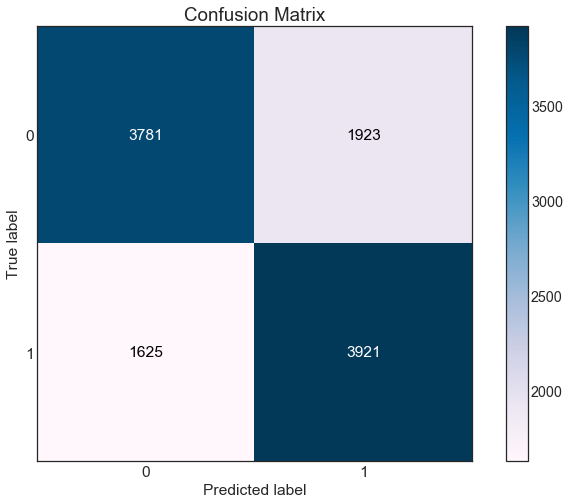

In [57]:
skplt.metrics.plot_confusion_matrix(TestLabelsB, PredictionB,normalize=False,figsize=(12,8), cmap=plt.cm.PuBu)
plt.show()

In [58]:
print(np.round(BernModel.predict_proba(TestDF),2))


ValueError: Expected input with 81 features, got 100 instead

In [ ]:
print(metrics.classification_report(TestLabels, PredictionB))
print(metrics.confusion_matrix(TestLabels, PredictionB))

In [ ]:
# top positive and negative features 
feature_to_coef = {
    word: coef for word, coef in zip(
        My_CV1.get_feature_names(), BernModel.coef_[0]
    )
}

for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)[:20]:
    print (best_positive)
    
print("\n\n")
for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])[:20]:
    print (best_negative)

### __MNB__

##### __-TFIDF__

In [ ]:
from sklearn.naive_bayes import MultinomialNB

MyModelNB1= MultinomialNB()

MyModelNB.fit(TrainDF_nolabels_tf, TrainLabels_tf)
Prediction = MyModelNB.predict(TestDF)
print("\nThe prediction from NB is:")
print(Prediction)
print("\nThe actual labels are:")
print(TestLabels_tf)

In [ ]:
## confusion matrix
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(TestLabels_tf, Prediction)
print("\nThe confusion matrix is:")
print(cnf_matrix)

In [ ]:
skplt.metrics.plot_confusion_matrix(TestLabels_tf, Prediction ,normalize=False,figsize=(12,8), cmap=plt.cm.PuBu)
plt.show()

In [ ]:
print(np.round(MyModelNB.predict_proba(TestDF_tf),2))

In [ ]:
from sklearn import metrics

print(metrics.classification_report(TestLabels_tf, Prediction))
print(metrics.confusion_matrix(TestLabels_tf, Prediction))

### __SVM__

__- CountVect__

In [ ]:
from sklearn.svm import LinearSVC

SVM_Model1=LinearSVC(C=0.01, multi_class="crammer_singer")
SVM_Model1.fit(TrainDF_nolabels, TrainLabels)

In [ ]:
print("SVM prediction:\n", SVM_Model1.predict(TestDF))
print("Actual:")
print(TestLabels)

In [ ]:
SVM_matrix = confusion_matrix(TestLabels, SVM_Model1.predict(TestDF))
print("\nThe confusion matrix is:")
print(SVM_matrix)
print("\n\n")

In [ ]:
skplt.metrics.plot_confusion_matrix(TestLabels, SVM_Model1.predict(TestDF),normalize=False,figsize=(12,8), cmap=plt.cm.PuBu)
plt.show()

In [ ]:
print(metrics.classification_report(TestLabels, SVM_Model1.predict(TestDF)))
print(metrics.confusion_matrix(TestLabels, SVM_Model1.predict(TestDF)))

In [ ]:
"""feature_ranks = sorted(zip(SVM_Model1.coef_[0], My_CV1.get_feature_names()))

## get the 10 features that are best indicators of very positivesentiment (they are at the bottom of the ranked list)
very_positive_10 = feature_ranks[-10:]
print("Very positive words")
for i in range(0, len(very_positive_10)):
    print(very_positive_10[i])
print()

## get 10 features that are least relevant to "very positive" sentiment (they are at the top of the ranked list)
not_very_positive_10 = feature_ranks[:10]
print("not very positive words")
for i in range(0, len(not_very_positive_10)):
    print(not_very_positive_10[i])
print()"""


Another SVM

In [ ]:
y=TrainLabels.copy()
X=TrainDF_nolabels.copy()

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=0.01)
model.fit(X, y)

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [ ]:
#plot_svc_decision_function(model)